In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('henry_tweet_final.xlsx')

In [3]:
df = df.drop(axis=1,columns='retweet')

In [4]:
df = df.drop(axis=1,columns='Unnamed: 0')

In [5]:
df = df['tweet']

In [6]:
#df

###  Data Cleaning

In [7]:
# Importing library 're' for removing url,numbers,punctuation
import re
def clean_url(review_text):
    return re.sub(r'http\S+','',review_text)

df = df.apply(clean_url)

In [8]:
#df

In [9]:
# Removing all irrelevant characters (Numbers and Punctuation)
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]',' ',review_text)

df = df.apply(clean_non_alphanumeric)


In [10]:
# Converting all to lowercase
def clean_lowercase(review_text):
    return str(review_text).lower()

df = df.apply(clean_lowercase)


In [11]:
#df

### Tokenization

In [12]:
list_of_twits = df.to_string()

In [13]:
import nltk

In [14]:
total_word = nltk.word_tokenize(list_of_twits)

### Removing Stopwords

In [15]:
from nltk.corpus import stopwords

In [16]:
stop_words = stopwords.words('english')
#print(stop_words)

In [17]:
def stopword_remover(list):
    without_stop_word = [] 
    for i in list:
        if i not in stop_words:
            without_stop_word.append(i)
    return without_stop_word

tweets_withot_stop_word = stopword_remover(total_word)

### Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
wnl = WordNetLemmatizer()

In [20]:
total_list=[]
def noun_lemmatizer(text):
    total_list.append([wnl.lemmatize(word,'n') for word in text])
    return total_list


In [21]:
tweets_withot_stop_word_1 = noun_lemmatizer(tweets_withot_stop_word)

In [22]:
total_list=[]
def verb_lemmatizer(text):
    total_list.append([wnl.lemmatize(word,'v') for word in text])
    return total_list

tweets_withot_stop_word_2 = verb_lemmatizer(tweets_withot_stop_word_1[0])

In [23]:
def adjective_lemmatizer(text):
    text = " ".join([wnl.lemmatize(word,'a') for word in text])
    return text

tweets_withot_stop_word_3 = adjective_lemmatizer(tweets_withot_stop_word_2[0])

### World Cloud

In [24]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

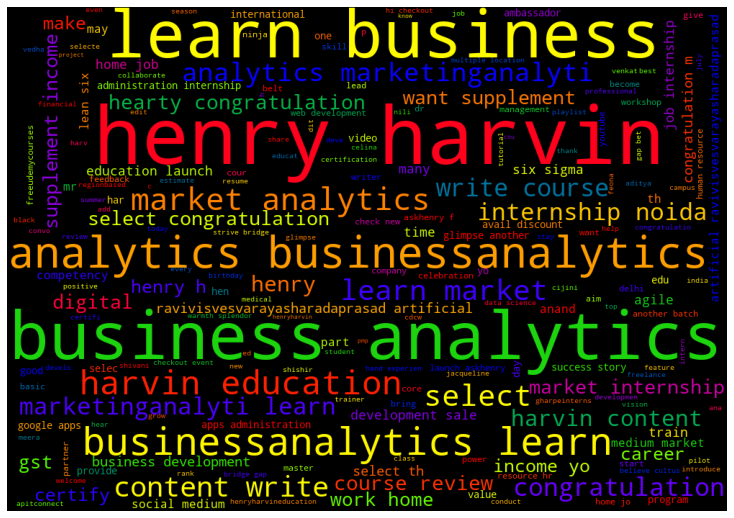

In [41]:
wordcloud = WordCloud(width = 1000, height = 700,background_color='black',
                     colormap='prism' , stopwords=STOPWORDS,random_state=1).generate(tweets_withot_stop_word_3)
# colormap='Accent'
# colormap='seismic'
# plot the WordCloud image                       
plt.figure(figsize = (10,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)  
plt.show()

## Sentiment Analysis

In [42]:
#Sentiment Score
#TextBlob takes only str input.

from textblob import TextBlob
b2 = TextBlob(tweets_withot_stop_word_3)
print(b2.sentiment)
#Polarity = 0.2778 --> Positive 

Sentiment(polarity=0.13193027210884356, subjectivity=0.3823374046588333)


In [52]:
data = pd.DataFrame(tweets_withot_stop_word_1)

In [54]:
data = data.transpose()

In [55]:
data

,0
0,0
1,...
2,1
3,project
4,management
...,...
2650,education
2651,llp
2652,career
2653,hen


In [56]:
vals=[]

for i in range(len(data)):
    tb=TextBlob(str(data.iloc[i,:]))
    if tb.sentiment.polarity > 0 and tb.sentiment.subjectivity>0:
        val=1
    elif tb.sentiment.polarity < 0 and tb.sentiment.subjectivity>0:
        val=-1
    else:
        val=0
    vals.append([tb.sentiment.polarity,round(tb.sentiment.subjectivity,3),val])

senti = pd.DataFrame(vals,columns=['polarity','subjectivity','emotion-sp'])


In [57]:
senti

,polarity,subjectivity,emotion-sp
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.5,1.0,1
4,0.0,0.0,0
...,...,...,...
2650,0.0,0.0,0
2651,0.0,0.0,0
2652,0.0,0.0,0
2653,0.0,0.0,0


In [58]:
result = pd.concat([data, senti], axis=1, join='inner')

In [59]:
# Showing sentiment analysis for each comments.
result

,0,polarity,subjectivity,emotion-sp
0,0,0.0,0.0,0
1,...,0.0,0.0,0
2,1,0.0,0.0,0
3,project,0.5,1.0,1
4,management,0.0,0.0,0
...,...,...,...,...
2650,education,0.0,0.0,0
2651,llp,0.0,0.0,0
2652,career,0.0,0.0,0
2653,hen,0.0,0.0,0


In [62]:
result.describe()

,polarity,subjectivity,emotion-sp
count,2655.000000,2655.000000,2655.000000
mean,0.006146,0.016519,0.013936
std,0.081357,0.108638,0.160637
min,-0.800000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000
